# Sentiment Analysis for Mental Health Monitoring 🤯


<img src="https://img.freepik.com/free-vector/mental-health-awareness-concept_23-2148531011.jpg" alt="Sample Image" width="100%" height="700">




## Sentiment Analysis for Mental Health Monitoring 🤯
___

> [dataset source](https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health) 🔗

---


```


```
---


## **About The Datset** 🧷
This comprehensive dataset is a meticulously curated collection of mental health statuses tagged from various statements. The dataset amalgamates raw data from multiple sources, cleaned and compiled to create a robust resource for developing chatbots and performing sentiment analysis.

---
## **Data Souce** 🌍
The dataset integrates information from the following Kaggle datasets:

 - 3k Conversations Dataset for Chatbot
 - Depression Reddit Cleaned
 - Human Stress Prediction
 - Predicting Anxiety in Mental Health Data
 - Mental Health Dataset Bipolar
 - Reddit Mental Health Data
 - Students Anxiety and Depression Dataset
 - Suicidal Mental Health Dataset
 - Suicidal Tweet Detection Dataset
---

###  **Datset Over View**  :

* **Description:**

    This dataset is a comprehensive collection of 50,000 text statements related to mental health, each tagged with one of seven mental health statuses. The primary purpose of this dataset is to assist in building machine learning models for classifying mental health conditions based on textual data, such as social media posts or other user-generated content.

* **Columns:**
  1. **unique_id**: A unique identifier for each entry.
  2. **statement**: A piece of text, typically a statement or comment, associated with a particular mental health status.
  3. **status**: The mental health status assigned to the statement. The possible categories are:
    - Normal
    - Depression
    - Suicidal
    - Anxiety
    - Stress
    - Bi-Polar
    - Personality Disorder

---
### **Usage** :
This dataset is ideal for training machine learning models aimed at understanding and predicting mental health conditions based on textual data.
It can be used in various applications such as:

- Chatbot development for mental health support.
- Sentiment analysis to gauge mental health trends.
-
---

### **How we use NLP Concepts**


  In our text processing methodology, we begin by removing punctuation, URLs, and hyperlinks from the statements. Additionally, we eliminate stop words, such as "is," "are," and "the," to enhance the focus on more informative terms.


  In the realm of morphological analysis, we extract the stems of the words. Subsequently, we employ a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to transform the processed text into a vector representation. This vector is then utilized to fit the mode

---

### **Conlusion**
  in the conclusion we train and tune  a four model wich is :
  * SVM  
  * Logistic Regression
  * Neural Ntwork
  * KNN
  the first three give a Convergent results with accuracy near to 76 % , and the last one give  a 65 % acc .

```css












```

---



## Two Level Classification  Approach

---

### About Two-Level Classification

In a two-level classification approach, we break down a multi-class classification problem into two stages:

1. **Stage 1 - Binary Classification**:
   - This stage first classifies data into two  categories: **Normal** ans **Non-Normal**.
   - By creating this separation, we simplify the problem and reduce the initial complexity, allowing the model to focus on distinguishing between these high-level classes.
   - This binary classifier uses features from the full dataset, ensuring that it can accurately detect if a statement falls into the "Normal" or "Non-Normal" category.

2. **Stage 2 - Multi-Class Classification**:
   - In this stage, we take statements classified as **Non-Normal** from Stage 1 and further classify them into specific mental health categories such as **Depression**, **Suicidal**, **Anxiety**, **Stress**, **Bi-Polar**, and **Personality Disorder**.
   - This multi-class classifier uses data that has already been identified as "Non-Normal," focusing on differentiating among various mental health conditions.
   
### Why Two-Level Classification?

- 🌵**Improved Accuracy**: This approach allows each classifier to focus on a subset of the problem, potentially increasing accuracy by reducing the complexity each model has to handle.
- 🍀 **Efficient Use of Resources**: By filtering out "Normal" cases in Stage 1, Stage 2 can concentrate only on differentiating among the specific mental health conditions, making it more efficient.
- 🦠 **Handling Imbalance**: Many datasets are imbalanced, with "Normal" cases being more common. Splitting the classification into two levels allows us to address class imbalance in each level separately.

### How It Works in This Model

1. **Data Preparation**:
   - First, we preprocess the dataset by cleaning the text and extracting features (e.g., TF-IDF, POS tags, emojis).
   - Then, we split the data for training and testing each stage separately.

2. **Training**:
   - **Stage 1**: We train a binary classifier on the full training data to classify statements as **Normal** or **Non-Normal**.
   - **Stage 2**: We train a multi-class classifier on the subset of training data labeled as **Non-Normal**, focusing only on the six specific mental health conditions.

3. **Testing**:
   - For each test instance, we first use Stage 1 to determine if it’s "Normal" or "Non-Normal."
   - If classified as **Non-Normal**, the instance is passed to Stage 2, where it is classified into one of the specific mental health categories.

### Evaluation and Metrics

- **Stage-Specific Metrics**: Each stage is evaluated separately, with accuracy, recall, precision, and F1-score measured for both the binary and multi-class classifiers.
- **Combined Evaluation**: Finally, we combine predictions from both stages to evaluate the overall performance of the two-level classification system.

This two-level approach allows us to accurately identify both "Normal" and specific mental health conditions, leveraging targeted classification strategies to improve overall accuracy and interpretability.

# *Dataset Loading and Preparing*

## Import Libraries :
---
lets start by importing the nessacary libraries

In [1]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 25.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import emoji

import re
import random
#from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import stanza
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


## Loading the dataset

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/CombinedData.csv', index_col=0)

In [6]:
df.head(3)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety


**notes1:** as we se at first , we have a three column the id which we should drop it, the statment that represent the "input" and the output which is the status. so our problem is just a classification and we need to make a nlp pre processing to extract feature  as we can from the statment to make them as input to the model.

**note2:** as we say, also we wil add some statistical feature (test len) to  nlp extracted features.

## some random example :

* to see the statement how itis

In [7]:
# Group by status and get a random statement from each group
random_statements = df.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])

# Print the results
for status, statement in random_statements.items():
    print(f"Status: {status}\n")
    print(f"Statement: {statement}\n")
    print("-----------------------------------")

Status: Anxiety

Statement: A reminder that progress isn't linear and that's okay! I felt like my anxiety had gotten worse lately and that I had gone backwards. This made me feel extremely discouraged and a sense of doom, until I saw this quote. I wanted to share in hopes that it will help others too. Don't be so harsh on yourself, anxiety is a curse that I wouldn't wish on my worst enemy (if I had any lol) 

Take care x

-----------------------------------
Status: Bipolar

Statement: Is lithium *making* me manic or did I forget what good feels like? I have a new doc, and at the same time, new insurance that won't cover Latuda. My old doc hadn't tried lithium for whatever reason, so this new doc is giving it a shot. I'm on a super low dose and  while I titrate off the Latuda, he's going to raise it in small increments.

And I feel great! I'd been in a depressive episode for two weeks and that is out the window. I've been more productive this week than the past two months. I have a rene

---
## Data set Descriping and statistics

In [8]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


## Missings Value Removal

In [9]:
df.isna().sum()

,0
statement,362
status,0


In [10]:
df.dropna(inplace = True)
df.isna().sum()

,0
statement,0
status,0


## What is our Labels 'target'?



In [11]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

## How the samples are distributed over the status ?

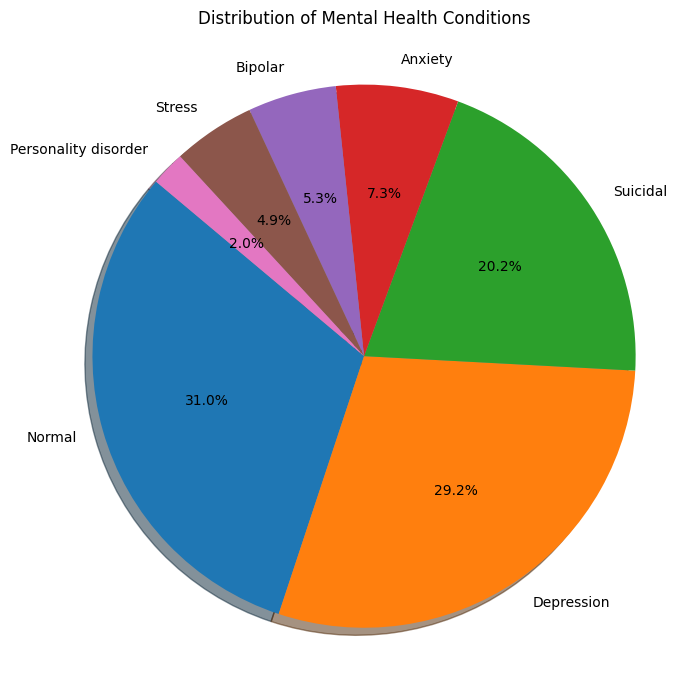

In [12]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors for 7 categories)
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()

## How the statements length are distibuted?

In [13]:
# calculate the length of each statement
df['statemnent_length'] = df['statement'].str.len()


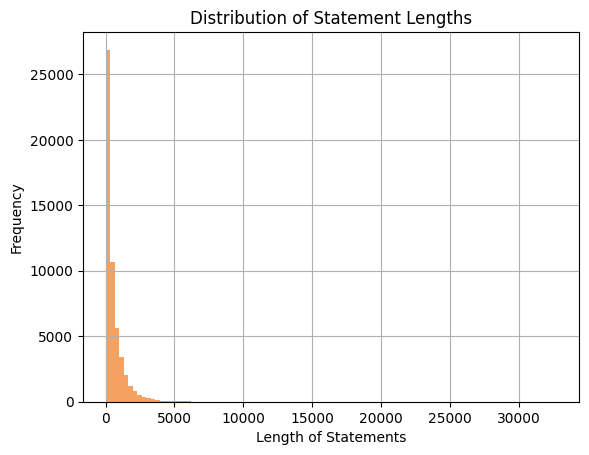

In [14]:
# plot the distribution of statement lengths
df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['statemnent_length'].quantile(0.25)
Q3 = df['statemnent_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

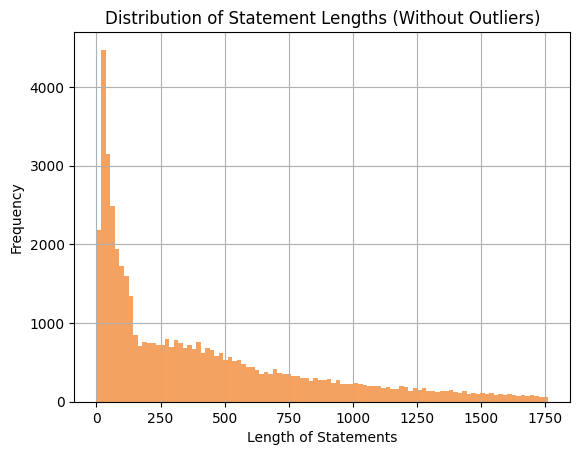

In [16]:
# Filter out the outliers
filtered_df = df[(df['statemnent_length'] >= lower_bound) & (df['statemnent_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

---
```








```
```








```
---

In [17]:
 nltk.download('stopwords')
 nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# ***🦖 NLP Pre-Processing***



## what we will do


---

in this part of the ml pipeline, we perform several essential NLP preprocessing steps to prepare our data for machine learning. These steps include:

  1. **Text Processing:**
      * include :
        - pattern reomving (links,emails and etc.)
        - lower casing
        - stop words removing

  2. **tokinezation & Stemming :**

     *  Tokenization :  
        - this step converts each text sample into an array of tokens (individual words or sub-words).
        -  we use Stanza word tokenizer to ensure precise, language-specific tokenization.
     * Stemming :
        
        - in this step, we transform each tokenized array into a stemmed version, reducing each word to its base or root form.
        - stanza NLP tools allow us to use various stemming techniques for extracting meaningful root words.
  

  3. **Part-of-Speech (POS) Tagging and Filtering**:

  - sing Stanza, we apply POS tagging to identify and filter specific parts of speech, such as:
       - **Verbs**: Identify and include only verbs to capture action-related semantics.
       - **Nouns**: Extract nouns to focus on entity- or object-based information.
       - **Adjectives**: Include adjectives to analyze descriptive language and sentiment.
  - This POS filtering allows us to tailor the input data by emphasizing different linguistic elements and can be customized based on the classification or NLP goals.



## 1. Text Processing:

### 1.1 Lower casing

In [18]:
df['statement']=df['statement'].str.lower()
df.sample(1)

,statement,status,statemnent_length
26287,"""i am happy..."" ""so happy to..."" ""wow, sth is ...",Depression,512


### 1.2 Special Patterns Removing

 here we define our function to remoe the speacial paterns which is  :  
 1. links
 2. emails
 3. markdown text
 4. handles
 5. puctuation

In [19]:
def remove_patterns(text):

    # remove URL's
    text = re.sub(r'http[s]?://\S+', '', text)

    # remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)

    # remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()


aplying the special patterns removing

In [20]:
# apply the function to the statements
df['statement'] = df['statement'].apply(remove_patterns)

### 1.3 Remove Stop words

In [21]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [22]:
# df['statement'] = df['statement'].apply(remove_stopwords)

### 1.4 Emoji-features Extractions

#### Convert smiles to words

In [23]:
# Function to convert emojis and emoticons to descriptive text
def convert_emojis(text):
    emoticon_map = {
        r':\)+': 'happy_face',
        r':D+': 'very_happy_face',
        r':\(+': 'sad_face',
        r':\'\(+': 'crying_face',
        r';\)+': 'winking_face',
        r':O': 'surprised_face',
        r'>:\(+': 'angry_face',
        r':\|': 'neutral_face',
        r'<3': 'heart',
        r'B-\)+': 'cool_face'
    }
    for emoticon, replacement in emoticon_map.items():
        text = re.sub(emoticon, replacement, text)
    text = emoji.demojize(text, delimiters=("", ""))
    return text


text of emojies only

In [24]:
import re

# Define the emoticon map with patterns and corresponding labels
emoticon_map = {
    r':\)+': 'happy_face',
    r':D+': 'very_happy_face',
    r':\(+': 'sad_face',
    r':\'\(+': 'crying_face',
    r';\)+': 'winking_face',
    r':O': 'surprised_face',
    r'>:\(+': 'angry_face',
    r':\|': 'neutral_face',
    r'<3': 'heart',
    r'B-\)+': 'cool_face'
}

# Function to extract emoticons and replace with descriptive labels
def extract_emojis(text):
    emoji_labels = []
    for pattern, label in emoticon_map.items():
        matches = re.findall(pattern, text)
        emoji_labels.extend([label] * len(matches))  # Add label for each matched emoticon
    return ' '.join(emoji_labels)  # Join labels into a single string

# Example usage
text = "I'm so happy :) and winking ;) with a heart <3"
print(extract_emojis(text))  # Output: "happy_face winking_face heart"


happy_face winking_face heart


apply the emoji converter

In [25]:
# Apply emoji conversion to the 'statement' column
df['statement_with_emojis'] = df['statement'].apply(convert_emojis)
df['statement'] = df['statement'].apply(convert_emojis)



#### emojies bar chart

In [26]:
from collections import Counter

# Split the emoji labels into individual words and flatten the list
all_emojis = ' '.join(df['statement_with_emojis']).split()  # Flatten all labels into a single list

# Count occurrences of each emoji label
emoji_counts = Counter(all_emojis)
emoji_counts_df = pd.DataFrame(emoji_counts.items(), columns=['Emoji', 'Count'])


In [27]:
emoji_counts_df

,Emoji,Count
0,oh,970
1,my,119437
2,gosh,44
3,trouble,564
4,sleeping,904
...,...,...
77347,coprophobia,1
77348,strokelike,1
77349,attacklike,1
77350,tingeling,1


In [28]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set up the plot
# plt.figure(figsize=(12, 8))
# sns.heatmap(emoticon_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Frequency'})

# # Add titles and labels
# plt.title("Distribution of Emoticons by Mental Health Status")
# plt.xlabel("Emoticon (Symbol and Description)")
# plt.ylabel("Mental Health Status")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()


### 1.5 Slang Converting

#### Define the set of slang

In [29]:
# Define a custom slang dictionary
slang_dict = {
    "idk": "I don't know",
    "omg": "oh my god",
    "rn": "right now",
    "brb": "be right back",
    "tbh": "to be honest",
    "ikr": "I know, right",
    "smh": "shaking my head",
    "lol": "laughing out loud",
    "lmao": "laughing my ass off",
    "rofl": "rolling on the floor laughing",
    "afaik": "as far as I know",
    "idc": "I don't care",
    "np": "no problem",
    "fyi": "for your information",
    "imo": "in my opinion",
    "pls": "please",
    "thx": "thanks",
    "w/": "with",
    "b4": "before",
    "bc": "because",
    "gr8": "great",
    "btwn": "between",
    "cya": "see you",
    "ty": "thank you",
    "bday": "birthday",
}


#### Define the expanding functino

In [30]:
changes = 0  # Count how many words are expanded


In [31]:

# Function to expand slang terms based on the custom dictionary
def expand_slang(text):
    words = text.split()
    expanded_words = []
    global changes
    for word in words:
        # Check if the word is in the slang dictionary
        expanded_word = slang_dict.get(word.lower(), word)
        if word.lower() in slang_dict:
            changes=changes+ 1  # Increment count if a word was expanded
        expanded_words.append(expanded_word)

    return ' '.join(expanded_words)

#### Apply the expanding

In [32]:

# Apply the slang expansion function to the 'statement' column
df['statement'] = df['statement'].apply(expand_slang)


In [33]:
print(f"Total number of slang words expanded across all rows: {changes}")


Total number of slang words expanded across all rows: 4525


## 2.Tokenization & Stemming

 #### Intialize Stanza Piplein

In [34]:
# Initialize the Stanza NLP pipeline
import nltk

# Download NLTK tokenizer models if not already done
nltk.download('punkt')

# Tokenization functions using NLTK
def word_tokenize(text):
    return nltk.word_tokenize(text)

def sentence_tokenize(text):
    return nltk.sent_tokenize(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2.1 Tokenization

#### How the sentences frequency is ?

In [35]:
# Calculate the number of sentences for each statement
df['num_of_sentences'] = df['statement'].apply(sentence_tokenize)

df.sample(5)  # Display a sample of the DataFrame

,statement,status,statemnent_length,statement_with_emojis,num_of_sentences
47727,im just tired i dont know why im even sad but ...,Depression,129,im just tired i dont know why im even sad but...,[im just tired i dont know why im even sad but...
7521,it is been along time and i have litterally be...,Suicidal,299,it is been along time and i have litterally be...,[it is been along time and i have litterally b...
2899,this is so big boy,Normal,18,this is so big boy,[this is so big boy]
20557,i feel so safe in this subreddit i do not even...,Suicidal,1793,i feel so safe in this subreddit i do not even...,[i feel so safe in this subreddit i do not eve...
9462,what if you are just going deeper and deeper i...,Suicidal,100,what if you are just going deeper and deeper i...,[what if you are just going deeper and deeper ...


bar chart for the num f scentences and its frequency

#### Words tokenization

define word tokenizing funcyion

In [36]:
nltk.download('punkt')

def extract_tokens(text):
    # Tokenize the text into words using NLTK
    words = nltk.word_tokenize(text)
    return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


apply extract tokenz function

In [37]:
# apply word tokenize to each element in the statements
df['tokens'] = df['statement'].apply(extract_tokens)


#### Sample after tokenizing

In [38]:
df.sample(2)

,statement,status,statemnent_length,statement_with_emojis,num_of_sentences,tokens
3251,i already told mom if you want to order it in ...,Normal,284,i already told mom if you want to order it in ...,[i already told mom if you want to order it in...,"[i, already, told, mom, if, you, want, to, ord..."
10035,life is fucking shit allways has been i have h...,Suicidal,191,life is fucking shit allways has been i have h...,[life is fucking shit allways has been i have ...,"[life, is, fucking, shit, allways, has, been, ..."


### 2.2 Stemming

#### Intializing the steemer

In [39]:
# Initialize the stemmer
stemmer = nltk.SnowballStemmer("english")

# Function to stem tokens
def tokens_stem(tokens):
    # Extract and stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


#### Apply the stemming Function

In [40]:
df['tokens_stemmed'] = df['tokens'].apply(tokens_stem)

#### Sample

In [41]:
# Display sample of the DataFrame
df.sample(5)

,statement,status,statemnent_length,statement_with_emojis,num_of_sentences,tokens,tokens_stemmed
52716,did i have a panic attack about a month ago i ...,Anxiety,3623,did i have a panic attack about a month ago i ...,[did i have a panic attack about a month ago i...,"[did, i, have, a, panic, attack, about, a, mon...",did i have a panic attack about a month ago i ...
41166,we re out of the bundus god complex stage of d...,Depression,70,we re out of the bundus god complex stage of d...,[we re out of the bundus god complex stage of ...,"[we, re, out, of, the, bundus, god, complex, s...",we re out of the bundus god complex stage of d...
49290,looking for participants to use a mobile app d...,Stress,3101,looking for participants to use a mobile app d...,[looking for participants to use a mobile app ...,"[looking, for, participants, to, use, a, mobil...",look for particip to use a mobil app design fo...
25644,now that i am planing my way to end my life i ...,Depression,455,now that i am planing my way to end my life i ...,[now that i am planing my way to end my life i...,"[now, that, i, am, planing, my, way, to, end, ...",now that i am plane my way to end my life i ki...
32825,but its real easy to slip on,Normal,30,but its real easy to slip on,[but its real easy to slip on],"[but, its, real, easy, to, slip, on]",but it real easi to slip on


---

```



```
---


### 2.3 word counts

In [42]:
colors = ['#16325B', '#227B94', '#78B7D0', '#FFDC7F', '#18587A', '#11999E', '#283644']

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

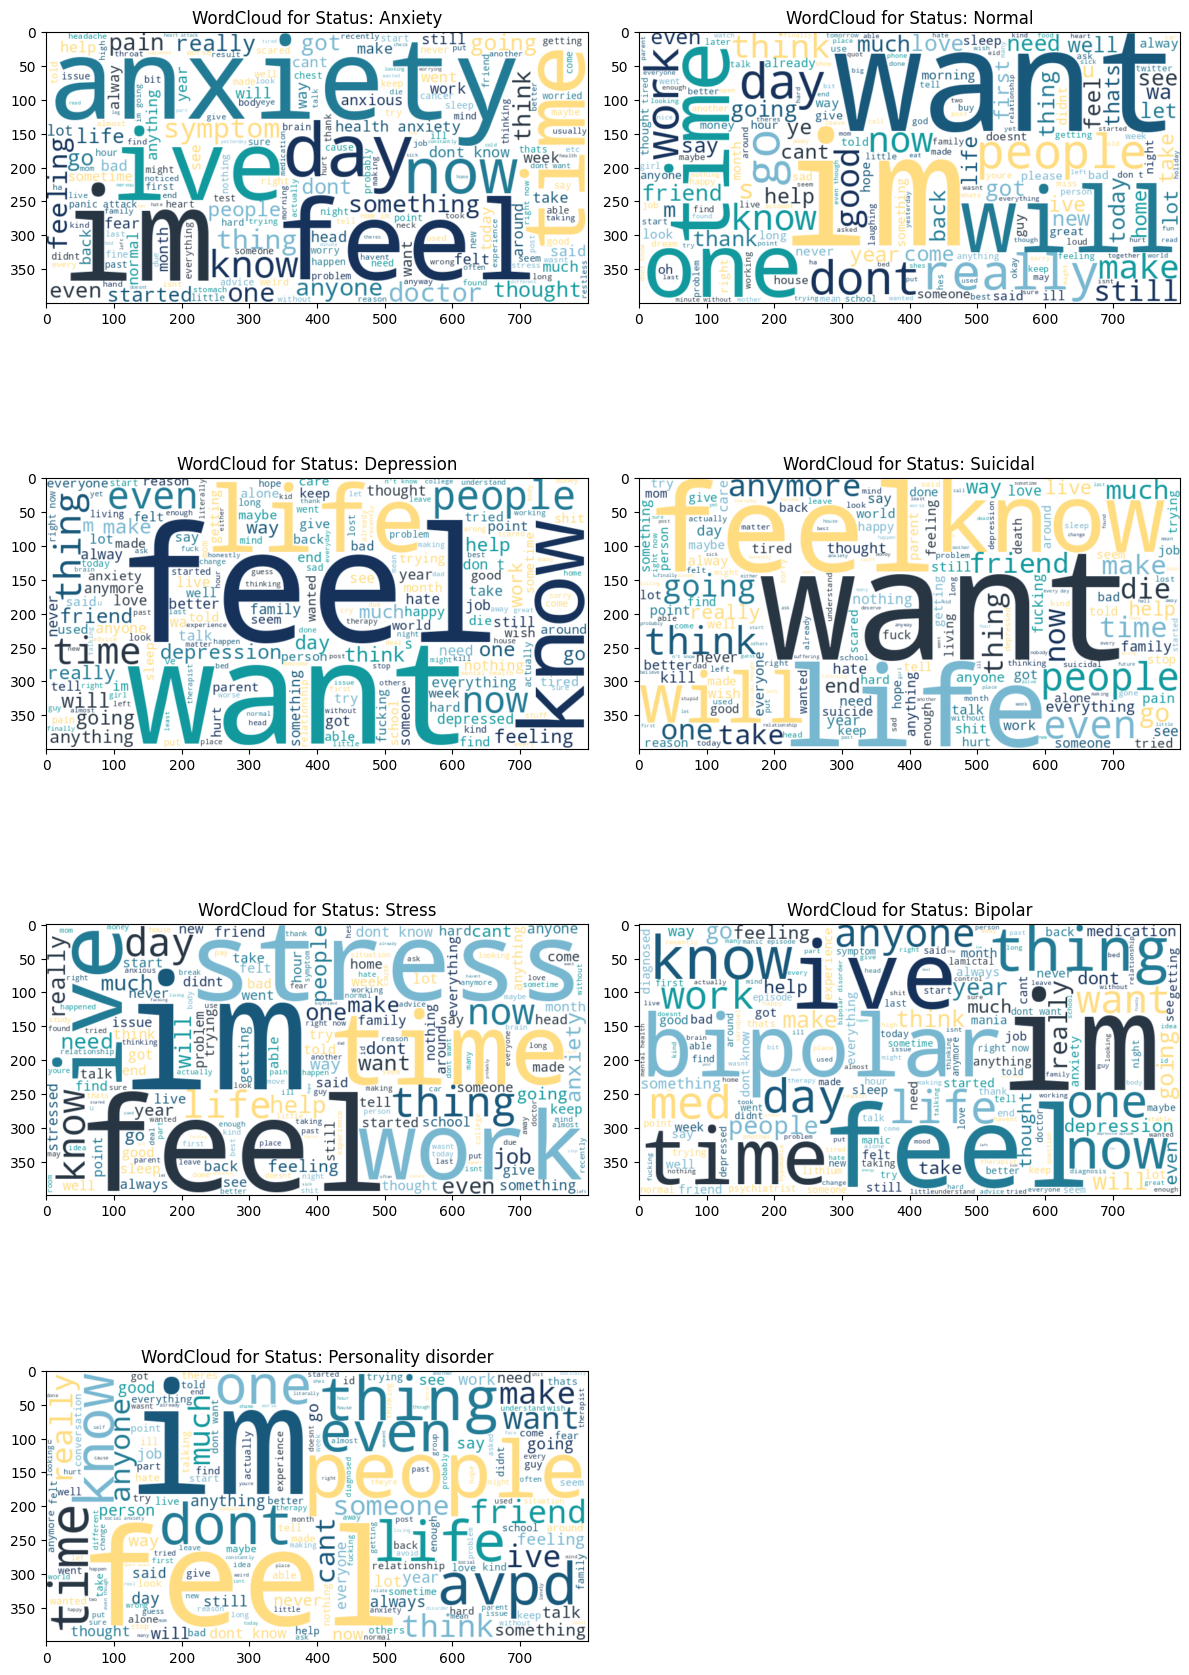

In [43]:
statuses = df['status'].unique()

plt.figure(figsize=(12, 36))  # Adjust figure size as needed

# Generate and plot the WordCloud for each category
for i, status in enumerate(statuses):
    # Filter the tokens data for the current status
    tokens_data = ' '.join(df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Plot the WordCloud in a subplot
    axes = plt.subplot(len(statuses) // 2 + 1, 2, i + 1)  # Adjust number of rows and columns dynamically
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Status: {status}')
    #plt.axis('off')  # Turn off axes for a cleaner look

# Apply tight layout after generating all subplots
plt.tight_layout()

# Adjust the vertical spacing between subplots (hspace controls vertical space)
plt.subplots_adjust(hspace= -0.8)
plt.show()

---
```








```
---



## 3. Part-Of-Speach (POS) Tagging

### 3.1 Extract POS Taggs

##### Nlp

In [44]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [45]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: en (English):
| Processor | Package         |
-------------------------------
| tokenize  | combined        |
| mwt       | combined        |
| pos       | combined_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


#### define function to extract pos

In [46]:
import nltk

def extract_pos_tokens(text, pos_tag_prefix):
    # Tokenize the input text
    tokens = nltk.word_tokenize(text)
    # Get the POS tags
    pos_tags = nltk.pos_tag(tokens)

    # Extract tokens based on POS tag prefix
    tokens_filtered = [word for word, pos in pos_tags if pos.startswith(pos_tag_prefix)]

    return ' '.join(tokens_filtered)

#### Extract Verbs

In [47]:
df['tokens_verbs'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'V'))

#### Extract Nouns

In [48]:
df['tokens_nouns'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'N'))

#### Extrac Adjectives

In [49]:
df['tokens_adj'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'J'))

#### Sample

In [50]:
df.sample(2)

,statement,status,statemnent_length,statement_with_emojis,num_of_sentences,tokens,tokens_stemmed,tokens_verbs,tokens_nouns,tokens_adj
34439,im convinced i may have blood clots in my leg ...,Anxiety,2699,im convinced i may have blood clots in my leg ...,[im convinced i may have blood clots in my leg...,"[im, convinced, i, may, have, blood, clots, in...",im convinc i may have blood clot in my leg at ...,convinced have caved was sleeping woke realize...,im i blood clots leg start week box spring bed...,i deep lower great right impossible difficult ...
3242,president director lee tina is successful who ...,Normal,72,president director lee tina is successful who ...,[president director lee tina is successful who...,"[president, director, lee, tina, is, successfu...",presid director lee tina is success who pay to...,is pays be,president director tina president,lee successful


# *Vectorizing using TF-IDF*

## About VEctorizing Approach

**What is the TF (Term of Frequency) and IDF (Inverse Document Frequency)?**

---
```


```
---

* **What is TF-IDF?**

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to evaluate the importance of a word in a document relative to a collection of documents, typically in the context of text mining and Natural Language Processing (NLP). It is commonly used as a feature extraction method to convert textual data into numerical features that machine learning models can process.

* The TF-IDF measure combines two components:

  1. **Term Frequency (TF):**

  **Definition:** The number of times a word (term) appears in a document, divided by the total number of words in that document. It gives us a sense of how important a word is within a single document.

  **Formula:**

   \begin{align}
   \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
   \end{align}

  
  2. **Inverse Document Frequency (IDF):**
  
    **Definition:** The logarithm of the total number of documents in the corpus divided by the number of documents containing the term.
  
    It measures how important a word is across the whole corpus. Common words that appear in many documents (like "the," "is") have low IDF values because they are less informative, while rare terms have higher IDF values.

    **Formula:**



  \begin{align}
   \text{IDF}(t, D) = \log \left( \frac{\text{Total number of documents in the corpus}}{1 + \text{Number of documents containing the term } t} \right)
 \end{align}

3. **TF-IDF:**

  **Definition:** The product of the term frequency (TF) and inverse document frequency (IDF) for a term in a document. It reflects both the term's frequency within a specific document and how unique or important the term is across the entire document corpus.
  
  **Formula:**

   \begin{align}
   \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
   \end{align}

  In these formulas:
  - \( t \) refers to a term (word),
  - \( d \) refers to a document,
  - \( D \) refers to the entire corpus (collection of documents),
  - \( \log \) is the logarithm function, typically base 10 or natural logarithm.


* **How TF-IDF is Useful**
  **Feature Extraction in NLP:** TF-IDF helps convert raw text data into a matrix of numerical features, making the data suitable for machine learning models. Each document is represented as a vector of TF-IDF values, where each value corresponds to the importance of a word in that document. This is a common technique in text classification tasks, such as sentiment analysis, spam detection, and topic classification.

  **Captures the Importance of Words:** By using TF-IDF, we can ignore frequently occurring but uninformative words (e.g., "the", "and") and focus on more meaningful terms that are key to the context of a document. This helps improve the accuracy and relevance of the model's predictions by emphasizing words that differentiate one document from another.

  **Reduces Noise in Text:** TF-IDF reduces the weight of very common words across all documents, as they are often not useful for distinguishing between documents. It assigns higher importance to rare and meaningful terms, which tend to carry more information about the content of the document.

  **Improves Text Similarity Measures:** TF-IDF vectors are often used to calculate the similarity between documents (e.g., using cosine similarity). This is useful in tasks like document clustering, search engines, and recommendation systems.

  
* **Use Case in Mental Health Sentiment Analysis**

  In our dataset, which contains mental health-related statements, applying TF-IDF can help the model understand which words are most significant for predicting the mental health status of a given statement. For example:

    - Words like "hopeless," "depressed," and "suicidal" may have high TF-IDF scores in documents labeled with "Depression" or "Suicidal" mental health statuses, but these words may be rare across other categories.
  
   - Common words like "I," "the," and "is" will have low IDF values since they appear in many documents, making them less useful for classification.

  By transforming the text data into TF-IDF vectors, you provide a more informative and compact representation of the statements, which can lead to better performance of machine learning models.



---
```









```
---

## Initialize separate TF-IDF Vectorizer


Initialize separate TF-IDF Vectorizer for verbs and nouns and adj , stemm


In [51]:
vectorizer_emojis = TfidfVectorizer(max_features=100, stop_words='english')

vectorizer_stemmes = TfidfVectorizer(ngram_range=(1, 2), max_features=2000, stop_words='english')

vectorizer_verbs = TfidfVectorizer(ngram_range=(1, 2), max_features=500, stop_words='english')

vectorizer_nouns = TfidfVectorizer(ngram_range=(1, 2), max_features=500, stop_words='english')

vectorizer_adjectives = TfidfVectorizer(ngram_range=(1, 2), max_features=500, stop_words='english')

## Extract Verb, Nouuns , ... Vectors

### Emojies

In [52]:
# Emojis

X_emojis_tfidf = vectorizer_emojis.fit_transform(df['statement_with_emojis'])


### stemmes

In [53]:
# Adjectives
X_stemm_tfidf = vectorizer_stemmes.fit_transform(df['tokens_stemmed'].astype(str))


### verbs

In [54]:

# Verbs

X_verbs_tfidf = vectorizer_verbs.fit_transform(df['tokens_verbs'].astype(str))


### nouns

In [55]:


# Nouns

X_nouns_tfidf = vectorizer_nouns.fit_transform(df['tokens_nouns'].astype(str))



### Adjectives

In [56]:
# Adjectives

X_adjectives_tfidf = vectorizer_adjectives.fit_transform(df['tokens_adj'].astype(str))


## comdine Vectors

In [57]:


# Combine all TF-IDF features into one matrix
X_combined_tfidf = hstack([2*X_verbs_tfidf, X_nouns_tfidf, 0.5 * X_adjectives_tfidf, 0.5*X_emojis_tfidf,2*X_stemm_tfidf])
print("Total number of combined features:", X_combined_tfidf.shape[1])


Total number of combined features: 3600


# *Dataset Spliting, Encoding and Staging*

In [58]:
from sklearn.model_selection import train_test_split

# Split the vectorized data into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X_combined_tfidf, df['status'], test_size=0.2, random_state=42)


### Encode LAbles and slpit status

#### Encode LAbles

In [59]:
# Encode labels for binary classification (Stage 1)
binary_encoder = LabelEncoder()
y_train_full_binary = binary_encoder.fit_transform(y_train_full.apply(lambda x: 'Normal' if x == 'Normal' else 'Non-Normal'))
y_test_binary = binary_encoder.transform(y_test.apply(lambda x: 'Normal' if x == 'Normal' else 'Non-Normal'))

# Encode labels for multi-class classification (Stage 2)
multi_encoder = LabelEncoder()
y_train_full_multi = multi_encoder.fit_transform(y_train_full[y_train_full != 'Normal'])  # Only for "Non-Normal" classes
y_test_multi = multi_encoder.transform(y_test[y_test != 'Normal'])  # Only for "Non-Normal" classes


#### split to Stages

In [60]:
# Split train data for Stage 1 and Stage 2
X_train_tfidf_stage1 = X_train_full
X_train_tfidf_stage2 = X_train_full[y_train_full != 'Normal']
y_train_tfidf_stage1 = y_train_full_binary
y_train_tfidf_stage2 = y_train_full_multi

X_test_tfidf_stage1 = X_test
X_test_tfidf_stage2 = X_test[y_test != 'Normal']



### OverSampling using SMOTE  

In [61]:

# Apply SMOTE for oversampling on Stage 2
smote = SMOTE(random_state=42)

X_train_tfidf_stage2, y_train_stage2 = smote.fit_resample(X_train_tfidf_stage2, y_train_tfidf_stage2)
#X_train_tfidf_stage1, y_train_stage1 = smote.fit_resample(X_train_tfidf_stage1, y_train_tfidf_stage1)



# ***Normal Statement Classification***

### What we will do


>  Stage 1

>  1.1  Logistic regression classifier

>  2.2 neural network classifier

>  2.3 chosssing the best classifier


##  1.1 Stage 1: Logistic Regression

### Grid Search Param Definie

In [62]:
# Define the binary classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 0.8,1,2, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type
}


###  Grid Search Fit

In [64]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf_stage1, y_train_tfidf_stage1)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 0.8, 1, 2, 10, 100],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

### best PArarms

In [65]:

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy}")


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy: 0.9417472775611442


In [66]:
svm_classifier= SVC(random_state=42)
#svm_classifier.fit(X_train_tfidf_stage1, y_train_stage1)

In [67]:
logistic1_classifier= grid_search.best_estimator_

### classification report

In [73]:
# Evaluate binary classifier
y_pred_stage1 = logistic1_classifier.predict(X_test_tfidf_stage1)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_stage1))
print(classification_report(y_test_binary, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_stage1))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.9425832779728576
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7229
           1       0.91      0.91      0.91      3308

    accuracy                           0.94     10537
   macro avg       0.93      0.93      0.93     10537
weighted avg       0.94      0.94      0.94     10537

Confusion Matrix:
 [[6920  309]
 [ 296 3012]]


### Heat Map

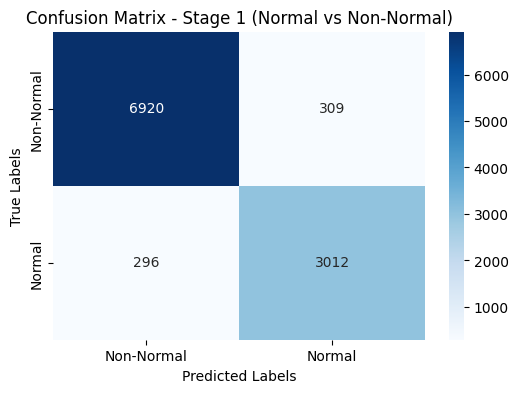

In [69]:
# Calculate confusion matrix for Stage 1
conf_matrix_stage1 = confusion_matrix(y_test_binary, y_pred_stage1)

# Plot heatmap for Stage 1
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_stage1, annot=True, fmt="d", cmap="Blues", xticklabels=binary_encoder.classes_, yticklabels=binary_encoder.classes_)
plt.title("Confusion Matrix - Stage 1 (Normal vs Non-Normal)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 1.2  Stage 1:  Neural Network

### Neural Network Layers

In [70]:
# Define the layers in an array
layers = [
    Dense(units=256, activation='relu', input_shape=(X_train_tfidf_stage1.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dense(units=2, activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Model Training

In [74]:

# Train the model on training data with validation on the test data
history = model.fit(X_train_tfidf_stage1.toarray(),
                    y_train_tfidf_stage1,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8819 - loss: 2.3918 - val_accuracy: 0.8916 - val_loss: 0.5478
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9294 - loss: 0.4073 - val_accuracy: 0.9224 - val_loss: 0.3505
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9278 - loss: 0.3346 - val_accuracy: 0.9281 - val_loss: 0.3144
Epoch 4/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9321 - loss: 0.3084 - val_accuracy: 0.9269 - val_loss: 0.3081
Epoch 5/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9372 - loss: 0.2871 - val_accuracy: 0.9311 - val_loss: 0.2966
Epoch 6/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9404 - loss: 0.2631 - val_accuracy: 0.9310 - val_loss: 0.2800
Epoch 7/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9419 - loss: 0.2580 - val_accuracy: 0.9330 - val_loss: 0.2700
Epoch 8/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9438 - loss: 0.2492 - 

### Confusion Matrix

In [75]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test_tfidf_stage1.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test_binary,y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix

conf_matrix_nn = confusion_matrix(y_test_binary,y_pred)

# Print classification report
print("Confusion Matrix:\n", confusion_matrix(y_test_binary,y_pred))
print(classification_report(y_test_binary, y_pred_stage1))


330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Accuracy: 0.9368890576065294
Confusion Matrix:
 [[6887  342]
 [ 323 2985]]


### Heat Map

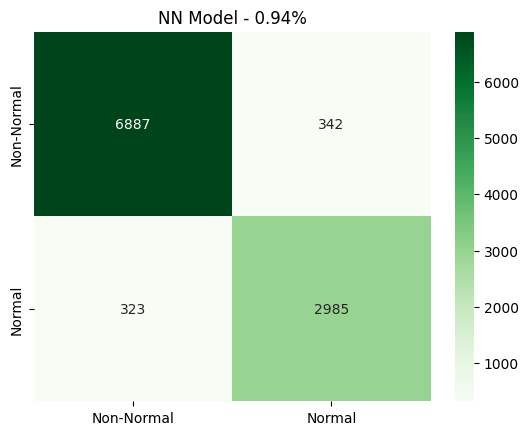

In [76]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=binary_encoder.classes_, yticklabels=binary_encoder.classes_)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

### Model Loss and Accuracy

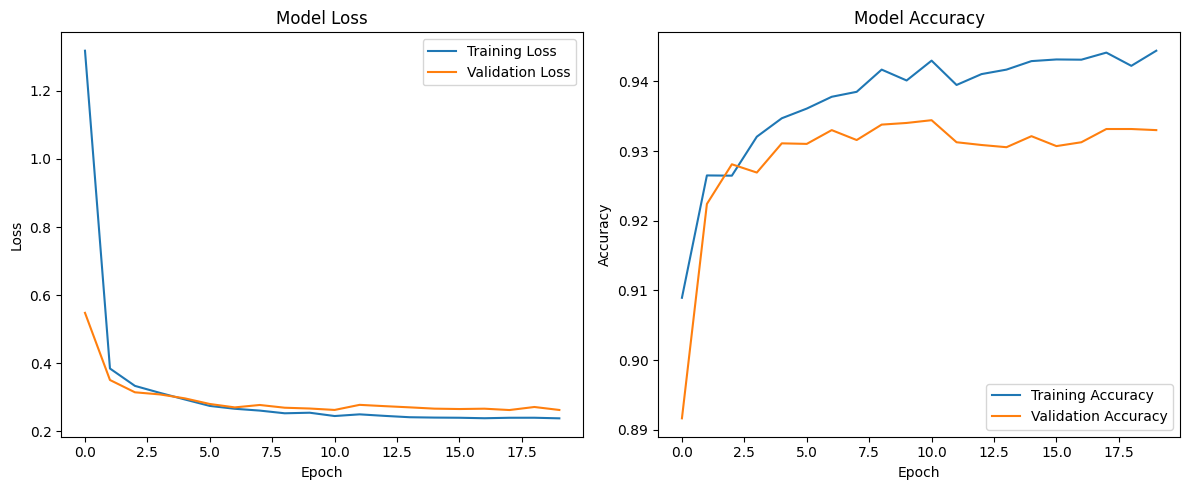

In [77]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## 1.3 Best Classifier for  Stage 1

we chose the best classfier for this stage

In [78]:
binary_classifier = logistic1_classifier

# ***Non Normal Statement Classification***

## 2.1 logistic Regression Stage 2

### Grid Search Params

In [111]:
# Define the binary classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [ 0.03,0.01, 0.02],  # Regularization strength
    'solver': ['lbfgs'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)



### Train the Model

In [112]:
# Fit the grid search on the training data
grid_search.fit(X_train_tfidf_stage2, y_train_stage2)



Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.03, 0.01, 0.02], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

### Best Classifier

In [113]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 0.03, 'penalty': 'l2', 'solver': 'lbfgs'}


In [114]:
# Train multi-class classifier for Stage 2
logistic_classifier =best_clf
#multi_classifier = SVC(random_state=42,kernel='poly')

# multi_classifier.fit(X_train_tfidf_stage2, y_train_stage2)


### Classification Report

In [116]:

# Evaluate multi-class classifier
y_pred_stage2 = logistic_classifier.predict(X_test_tfidf_stage2)
print("Stage 2 (Multi-Class Classification) - Specific Conditions")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_stage2))
print(classification_report(y_test_multi, y_pred_stage2))
conf_matrix_stage2= confusion_matrix(y_test_multi, y_pred_stage2)
print("Confusion Matrix:\n",conf_matrix_stage2)


Stage 2 (Multi-Class Classification) - Specific Conditions
Accuracy: 0.709088393968737
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       755
           1       0.70      0.79      0.74       527
           2       0.79      0.64      0.71      3016
           3       0.47      0.74      0.58       237
           4       0.60      0.66      0.63       536
           5       0.67      0.75      0.71      2158

    accuracy                           0.71      7229
   macro avg       0.67      0.74      0.69      7229
weighted avg       0.72      0.71      0.71      7229

Confusion Matrix:
 [[ 622   33   23   24   44    9]
 [  15  416   31   26   26   13]
 [  77   94 1934   76   99  736]
 [   8   15   16  176   18    4]
 [  60   26   25   37  356   32]
 [  27   10  418   32   49 1622]]


### Heat Map

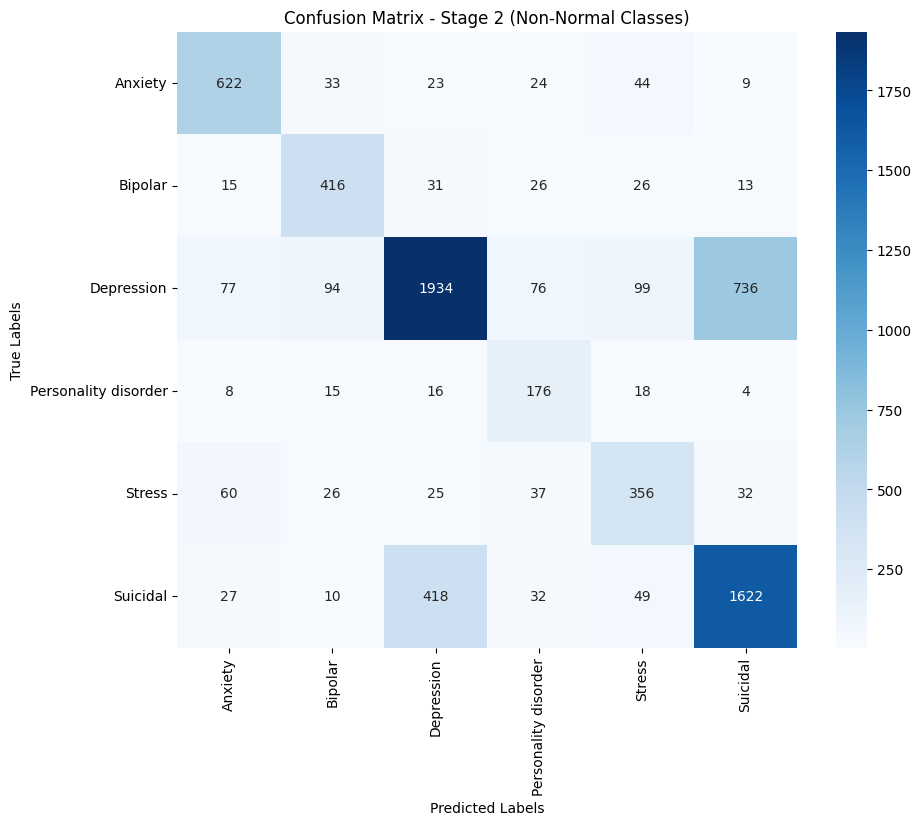

In [117]:
# Plot heatmap for Stage 2
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_stage2, annot=True, fmt="d", cmap="Blues", xticklabels=multi_encoder.classes_, yticklabels=multi_encoder.classes_)
plt.title("Confusion Matrix - Stage 2 (Non-Normal Classes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 2.2 Neural Network  Stage 2

### Network Layers

In [124]:
# Define the layers in an array
layers = [
    Dense(units=120, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.3),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dense(units=6, activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Model Train

In [125]:

# Train the model on training data with validation on the test data
history = model.fit(X_train_tfidf_stage2.toarray(),
                    y_train_stage2,
                    epochs=20,
                    batch_size=256,
                    validation_split=0.3
                    )


Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.6011 - loss: 3.0781 - val_accuracy: 0.2891 - val_loss: 2.1696
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8278 - loss: 0.9390 - val_accuracy: 0.4247 - val_loss: 1.6755
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8322 - loss: 0.7690 - val_accuracy: 0.6268 - val_loss: 1.3151
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8391 - loss: 0.7311 - val_accuracy: 0.6733 - val_loss: 1.2245
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8442 - loss: 0.7100 - val_accuracy: 0.6598 - val_loss: 1.2445
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8458 - loss: 0.7101 - val_accuracy: 0.6237 - val_loss: 1.3755
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8480 - loss: 0.6984 - val_accuracy: 0.6246 - val_loss: 1.3276
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8466 - loss: 0.7100 - val_accu

In [126]:
nn_classifier = model

### Classification Report

In [130]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test_tfidf_stage2.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_score_final = accuracy_score(y_test_multi,y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix
classification_report_final =classification_report(y_test_multi, y_pred)
print(f"Overall Accuracy: {accuracy_score_final:.2f}")

print(classification_report_final)
conf_matrix_nn = confusion_matrix(y_test_multi,y_pred)

# Print classification report
print("Confusion Matrix:\n",conf_matrix_nn)


226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy: 0.7187716143311661
Overall Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       755
           1       0.66      0.85      0.74       527
           2       0.78      0.67      0.72      3016
           3       0.61      0.65      0.63       237
           4       0.68      0.49      0.57       536
           5       0.67      0.77      0.72      2158

    accuracy                           0.72      7229
   macro avg       0.70      0.71      0.70      7229
weighted avg       0.72      0.72      0.71      7229

Confusion Matrix:
 [[ 636   36   27   11   30   15]
 [  16  448   29    8   18    8]
 [  66   87 2014   33   48  768]
 [  13   25   23  154   15    7]
 [  80   67   52   36  265   36]
 [  16   16  440   10   11 1665]]


### Heat Map

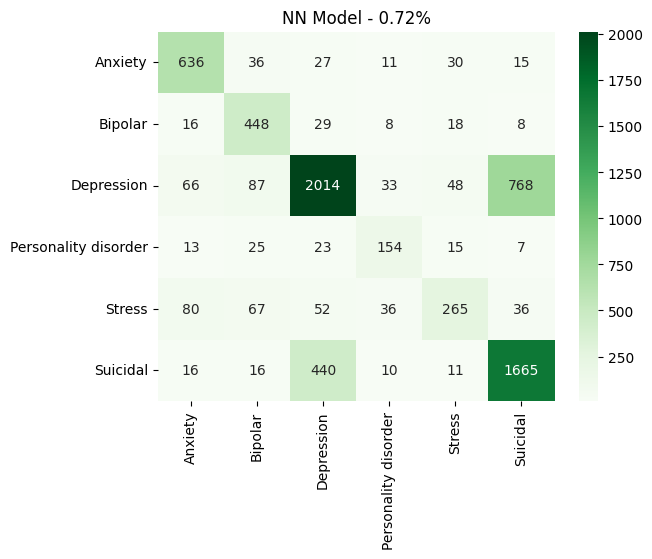

In [131]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=multi_encoder.classes_, yticklabels=multi_encoder.classes_)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

### Model Loss and Accuracy

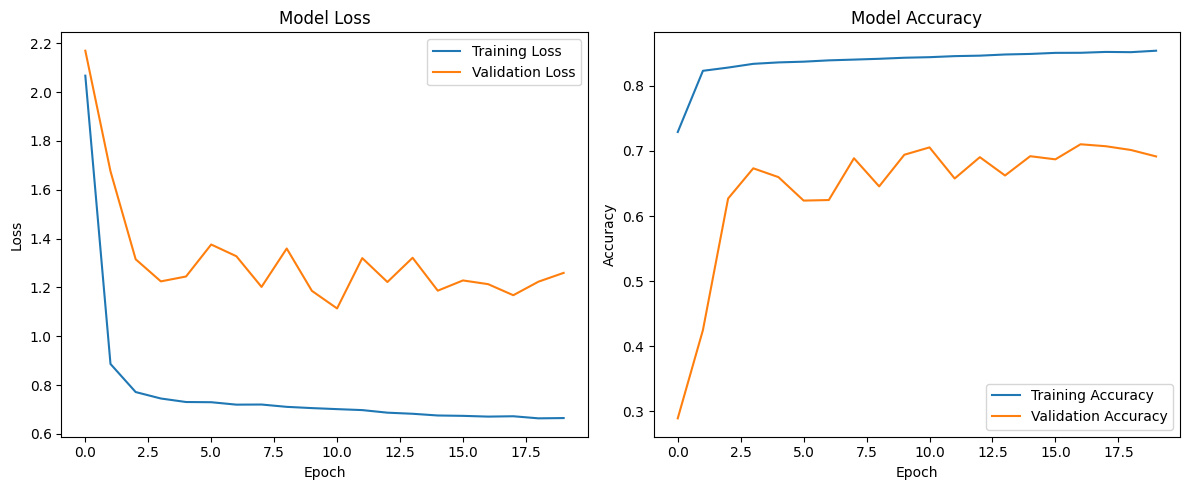

In [132]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## 2.3 Best Model

choosing the best classfier for this stage

In [118]:
multi_classifier = logistic_classifier

# ***combined Two Classifiers***

## ***3.1 Predict the test set***

### Initialize list for final predictions and true labels


In [119]:
# Initialize list for final predictions and true labels
final_predictions = []
ground_truth = y_test.tolist()  # Convert y_test to list for easy comparison


### Iterate Over the Test Samples

In [120]:

# Iterate through each sample in X_test
for i, test in enumerate(X_test):
    # Vectorize the text for Stage 1
    # vectorized_text_stage1 = vectorizer_stage1.transform([text])

    # Stage 1 Prediction (Binary Classification)
    stage1_prediction = binary_classifier.predict(test)[0]

    if stage1_prediction == binary_encoder.transform(['Normal'])[0]:  # If predicted as "Normal"
        final_predictions.append('Normal')
    else:
        # If predicted as "Non-Normal," vectorize for Stage 2 and predict specific condition
        # vectorized_text_stage2 = vectorizer_stage2.transform([text])
        stage2_prediction = multi_classifier.predict(test)[0]
        #stage2_prediction = model.predict(test).argmax(axis=1)

        final_predictions.append(multi_encoder.inverse_transform([stage2_prediction])[0])


## ***3.2 Classification Report***

In [121]:
accuracy_score_final=accuracy_score(ground_truth, final_predictions)
classification_report_final =classification_report(ground_truth, final_predictions)
# Final Combined Evaluation
print("\nCombined Two-Level Classification Results")
print(f"Overall Accuracy: {accuracy_score_final:.2f}")
print(classification_report_final)



Combined Two-Level Classification Results
Overall Accuracy: 0.76
                      precision    recall  f1-score   support

             Anxiety       0.75      0.80      0.77       755
             Bipolar       0.69      0.78      0.73       527
          Depression       0.78      0.64      0.70      3016
              Normal       0.91      0.91      0.91      3308
Personality disorder       0.46      0.72      0.56       237
              Stress       0.55      0.60      0.57       536
            Suicidal       0.66      0.73      0.69      2158

            accuracy                           0.76     10537
           macro avg       0.68      0.74      0.71     10537
        weighted avg       0.77      0.76      0.76     10537



## ***3.3 Overall Heat Map***

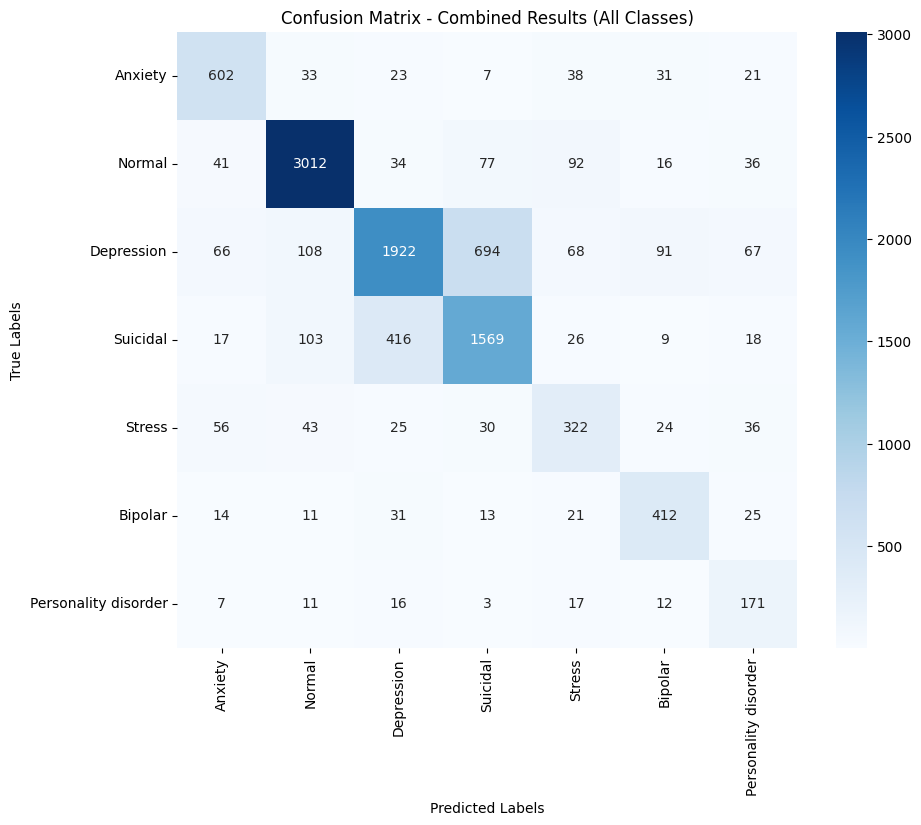

In [122]:
# Confusion Matrix and Heatmap for Combined Results
conf_matrix_combined = confusion_matrix(ground_truth, final_predictions, labels=df['status'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt="d", cmap="Blues", xticklabels=df['status'].unique(), yticklabels=df['status'].unique())
plt.title("Confusion Matrix - Combined Results (All Classes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## ***3.4 Conclusion***

---
# End
---

<img src="https://img.freepik.com/free-vector/flat-world-mental-health-day-background_23-2149671212.jpg" alt="Sample Image" width="100%" height="417">
